In [1]:
%load_ext autoreload
%autoreload 2

#%pip install keras-tuner


from pathlib import Path
import os
import sys
sys.path.insert(0, "..")
sys.path

import numpy as np
import seaborn as sns
sns.set_theme()

import pandas as pd

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from src.data import make_dataset


from src.visualization import visualize_simple





In [2]:
datadir_processed = Path("../data/processed")

In [3]:
data = []
labels = []

for f in sorted(os.listdir(datadir_processed)):
    folder = os.path.join(datadir_processed, f)
    if os.path.isdir(folder):
        #print(f"{f} is a target class")
        for i in sorted(os.listdir(folder)):
            image=tf.keras.preprocessing.image.load_img(folder+'/'+i, 
            target_size= (64,64))
            image=np.array(image)
            data.append(image)
            labels.append(f)

data = np.array(data)
#labels = np.array(labels)
labels = list(labels)
#labels_text = labels
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
#labels = to_categorical(labels)



X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.125,
                                                random_state=42)




# Pre-processing
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

labels

(12414, 128, 128, 3)
(3548, 128, 128, 3)
(1774, 128, 128, 3)


array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [4]:
simple_model1 = keras.models.Sequential([
keras.layers.Flatten(input_shape=[64, 64, 3]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

simple_model1.summary()



#model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',
#input_shape=(64,64,3)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 300)               14745900  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 14,777,010
Trainable params: 14,777,010
Non-trainable params: 0
_________________________________________________________________


In [5]:


simple_model1.compile(loss="sparse_categorical_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

In [6]:
y_train.shape

(12414,)

In [7]:
hist_simple_model1 = simple_model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
388/388 [==============================] - 14s 35ms/step - loss: 2.3118 - accuracy: 0.2238 - val_loss: 2.0246 - val_accuracy: 0.2587
Epoch 2/20
388/388 [==============================] - 13s 34ms/step - loss: 1.9325 - accuracy: 0.2774 - val_loss: 2.0388 - val_accuracy: 0.2599
Epoch 3/20
388/388 [==============================] - 13s 35ms/step - loss: 1.8193 - accuracy: 0.3244 - val_loss: 1.8234 - val_accuracy: 0.3269
Epoch 4/20
388/388 [==============================] - 14s 35ms/step - loss: 1.6518 - accuracy: 0.3975 - val_loss: 1.5610 - val_accuracy: 0.4419
Epoch 5/20
388/388 [==============================] - 13s 35ms/step - loss: 1.5340 - accuracy: 0.4444 - val_loss: 1.6905 - val_accuracy: 0.3596
Epoch 6/20
388/388 [==============================] - 13s 34ms/step - loss: 1.4777 - accuracy: 0.4679 - val_loss: 1.7325 - val_accuracy: 0.3619
Epoch 7/20
388/388 [==============================] - 13s 34ms/step - loss: 1.4065 - accuracy: 0.4911 - val_loss: 1.5047 - val_accuracy:

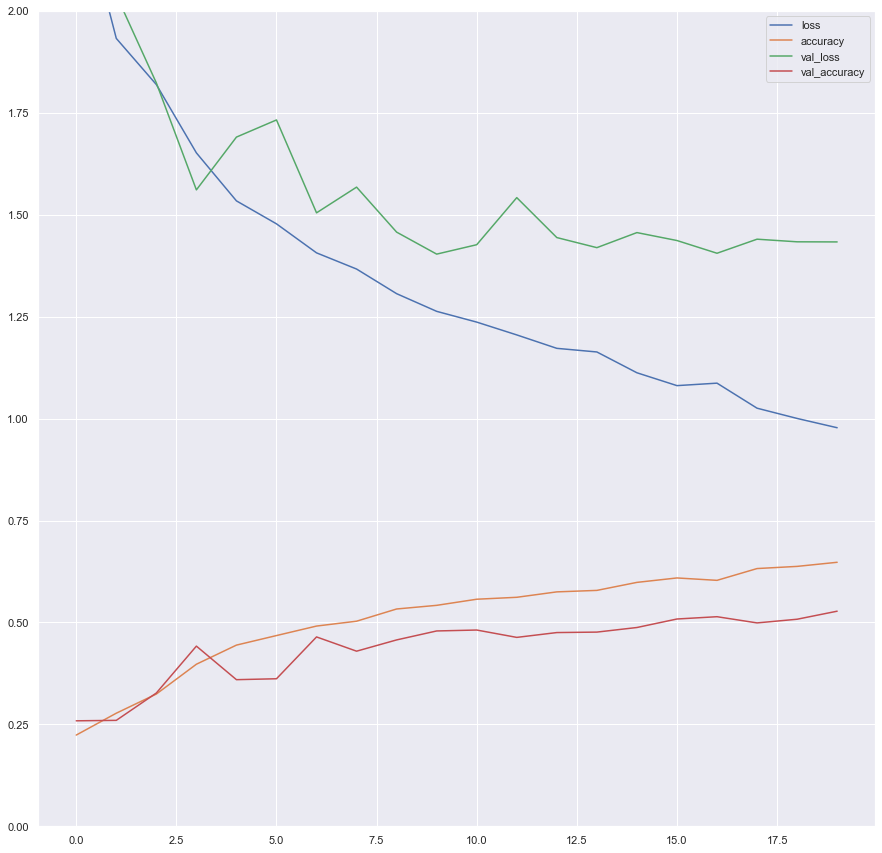

In [8]:
pd.DataFrame(hist_simple_model1.history).plot(figsize=(15, 15))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-2]
plt.show()

In [9]:
#y_test = np.argmax(y_test,axis=1)
predict = simple_model1.predict(X_test).argmax(axis=1)


In [10]:
#encoder = LabelEncoder()
#y_test = encoder.fit_transform(y_test)
#predict = encoder.fit_transform(predict)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.37      0.45      0.40       393
           1       0.21      0.09      0.12        68
           2       0.38      0.06      0.10       218
           3       0.57      0.80      0.67       378
           4       0.68      0.81      0.74       279
           5       0.47      0.55      0.50       380
           6       0.62      0.81      0.70       563
           7       0.55      0.63      0.59       399
           8       0.44      0.32      0.37       516
           9       0.46      0.17      0.25       354

    accuracy                           0.53      3548
   macro avg       0.47      0.47      0.44      3548
weighted avg       0.50      0.53      0.49      3548



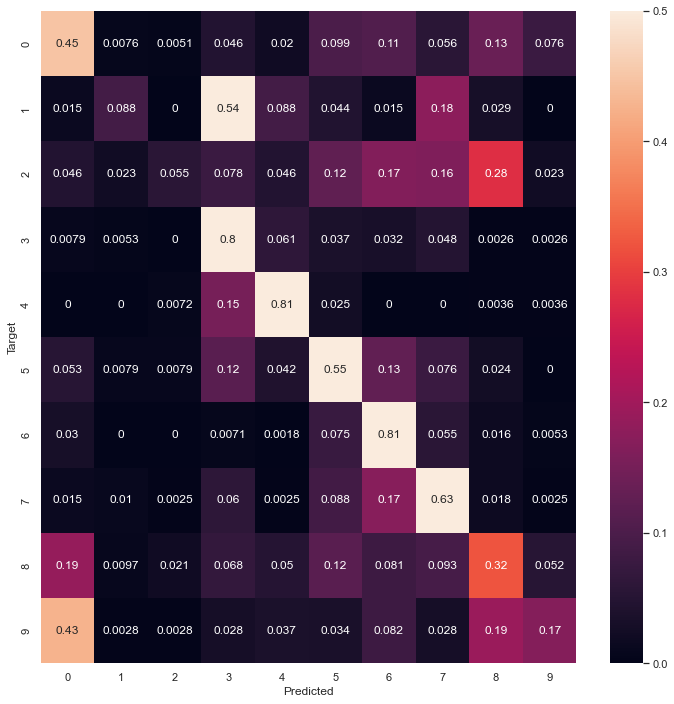

In [11]:
cfm = confusion_matrix(y_test, predict)
visualize_simple.cfm_heatmap(cfm, figsize=(12,12), scale='rowwise', vmax= 0.5)